In [3]:
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import os

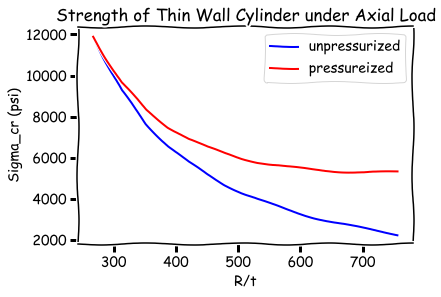

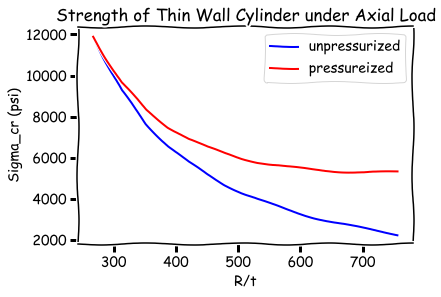

pbar [ 0.1         0.13684211  0.17368421  0.21052632  0.24736842  0.28421053
  0.32105263  0.35789474  0.39473684  0.43157895  0.46842105  0.50526316
  0.54210526  0.57894737  0.61578947  0.65263158  0.68947368  0.72631579
  0.76315789  0.8       ]
sigma_np [ 11889.01054055   9254.68659828   7650.34690072   6561.01187624
   5768.32110917   5163.07660338   4684.30875273   4295.1668773
   3972.00153121   3698.90457089   3464.76172447   3261.56165241
   3083.37644684   2925.72099013   2785.13603658   2658.90861443
   2544.87956687   2441.30801385   2346.77395385   2260.10700446]
sigma_p [ 11889.01054055   9640.19693358   8334.72440457   7493.43698259
   6915.24278885   6500.58286577   6194.4203143    5963.82083698
   5787.86024741   5652.60639932   5548.42576288   5468.44698537
   5407.63979298   5362.23946875   5329.37444479   5306.81798293
   5292.81822964   5285.97922678   5285.17590481   5289.49225563]


In [6]:
# cylinder obj
class airframe(object):
    """airframe creates an instance of an object that defines the properties of
    an axially loaded cylinder under various loading conditions and internal
    pressures"""
    def __init__(self):
        super(airframe, self).__init__()
        self.L = 36.0  # setting length of cylinder as a contant for now (inches)
        self.E = 10.0**7  # modulus of elasticity for AL 6061-T4 (psi)
        self.num_steps = 20

        self.get_pbar()
        self.get_p()
        self.get_delta_sigmacrbar()
        self.get_Rtratio()
        self.get_R()
        self.get_t()
        self.get_K0()
        self.get_sigmacrbar0()
        self.get_sigmacr_np()
        self.get_sigmacrbar_p()
        self.get_sigmacr_p()
        self.plot_sigmacr_np_v_tR()

    def get_pbar(self):
        """generate array of pbar values
        in the linear region as defined by
        Fung and Sechler"""
        self.pbar = np.linspace(0.1, 0.8, self.num_steps)

    def get_p(self):
        # self.p = np.linspace(0.0, 14.0, self.num_steps)
        self.p = 14.0  # setting as a constant for now; this should be changed later

    def get_delta_sigmacrbar(self):
        """constand defined by Fung and Sechler"""
        self.delta_sigmacrbar = np.linspace(0, 0.229, self.num_steps)

    def get_Rtratio(self):
        """get ratios of R/t based on each pbar value and p values"""
        self.Rtratio = np.sqrt(self.pbar/self.p*self.E)

    def get_R(self):
        """constant value defined by vehicle size"""
        self.R = 6.0  # inches

    def get_t(self):
        self.t = self.R/self.Rtratio

    def get_K0(self):
        """K0 is calculated from a formula derived from empirical measurements
        made by Fung et. Sechler"""
        self.K0 = self.Rtratio*(9*(1.0/self.Rtratio)**1.6 +
                                0.16*(self.t/self.L)**1.3)

    def get_sigmacrbar0(self):
        self.sigmacrbar0 = self.K0

    def get_sigmacr_np(self):
        """calculate sigmacr without internal pressure"""
        self.sigmacr_np = self.K0 * self.E / self.Rtratio

    def get_sigmacrbar_p(self):
        self.sigmacrbar_p = self.sigmacrbar0 + self.delta_sigmacrbar

    def get_sigmacr_p(self):
        self.sigmacr_p = self.sigmacrbar_p * self.E / self.Rtratio

    def plot_sigmacr_np_v_tR(self):
        with plt.xkcd():
            plt.plot(self.Rtratio, self.sigmacr_np, 'b', label='unpressurized')
            plt.plot(self.Rtratio, self.sigmacr_p, 'r', label='pressureized')
            plt.xlabel('R/t')
            plt.ylabel('Sigma_cr (psi)')
            plt.title('Strength of Thin Wall Cylinder under Axial Load')
            plt.legend(loc='upper right')
            plt.savefig(os.path.join(os.getcwd(), 'AxialStrengthRt.png'))
            plt.show()

LaunchySLV = airframe()
LaunchySLV.plot_sigmacr_np_v_tR()

print('pbar', LaunchySLV.pbar)
print('sigma_np', LaunchySLV.sigmacr_np)
print('sigma_p', LaunchySLV.sigmacr_p)